Are the performances of our models on different benchmarks proportional to the word frequencies in our corpus?

In [1]:
import matplotlib.pyplot as plt

from collections import Counter
from statistics import mean, stdev

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Experiments/datasets-analysis

Mounted at /content/drive
/content/drive/MyDrive/Experiments/datasets-analysis


# Get Corpus

In [3]:
from preprocess import preprocess

In [4]:
with open('text8') as f:
    text = f.read()

words = preprocess(text)
word_counts = Counter(words)

print("Total words in text: %d" % (len(words)))
print("Unique words in text: %d" % (len(set(words))))

Total words in text: 8448361
Unique words in text: 63459


# Get Benchmarks

In [5]:
lines = open('wordsim_similarity_goldstandard.txt', 'r').readlines()
wordsim_similarity = [line.lower().strip().split() for line in lines]

lines = open('wordsim_relatedness_goldstandard.txt', 'r').readlines()
wordsim_relatedness = [line.lower().strip().split() for line in lines]

wordsim_combined = wordsim_similarity + wordsim_relatedness

lines = open('standford-rw-similarity.txt', 'r').readlines()
standford_rw = [line.lower().strip().split()[:3] for line in lines]

lines = open('rg65.txt', 'r').readlines()
rg65 = [line.lower().strip().split()[:3] for line in lines]

lines = open('simlex.txt', 'r').readlines()
simlex = [line.lower().strip().split()[:4] for line in lines[1:]]
simlex = [[x[0], x[1], x[3]] for x in simlex]

In [6]:
sets = ["WS Sim", "WS Rltd.", "WS Combined", "St-RW", "RG65", "Simlex"]

# Calculate Word Frequencies for Each Benchmark

In [7]:
def get_frequency(benchmark, word_counts):
  frequencies = list()
  for w in benchmark:
    frequencies.append(word_counts[w[0]])
    frequencies.append(word_counts[w[1]])
  return mean(frequencies), stdev(frequencies)

In [8]:
averages, deviations = list(), list()

avg, var = get_frequency(wordsim_similarity, word_counts)
averages.append(avg)
deviations.append(var)

avg, var = get_frequency(wordsim_relatedness, word_counts)
averages.append(avg)
deviations.append(var)

avg, var = get_frequency(wordsim_combined, word_counts)
averages.append(avg)
deviations.append(var)

avg, var = get_frequency(standford_rw, word_counts)
averages.append(avg)
deviations.append(var)

avg, var = get_frequency(rg65, word_counts)
averages.append(avg)
deviations.append(var)

avg, var = get_frequency(simlex, word_counts)
averages.append(avg)
deviations.append(var)

In [9]:
for idx, s in enumerate(sets):
  print("--- %s ---\n[AVG] %.3f [STD] %.3f" % (s, averages[idx], deviations[idx]))

--- WS Sim ---
[AVG] 1589.039 [STD] 2344.203
--- WS Rltd. ---
[AVG] 1897.500 [STD] 2624.417
--- WS Combined ---
[AVG] 1759.879 [STD] 2506.632
--- St-RW ---
[AVG] 531.347 [STD] 1425.647
--- RG65 ---
[AVG] 414.946 [STD] 556.432
--- Simlex ---
[AVG] 1183.171 [STD] 2095.807


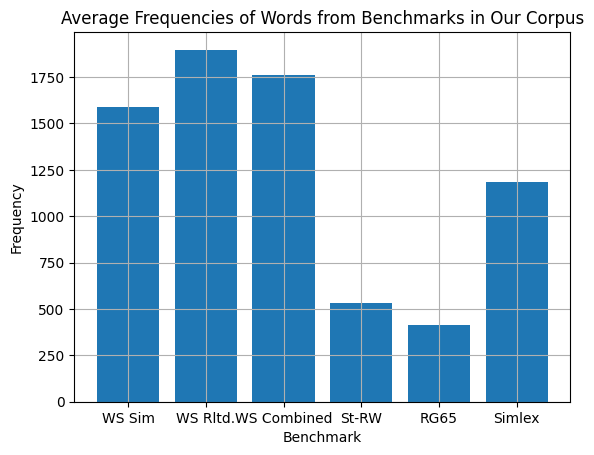

In [10]:
plt.bar(sets, averages)

plt.title("Average Frequencies of Words from Benchmarks in Our Corpus")
plt.xlabel("Benchmark")
plt.ylabel("Frequency")
plt.grid("both")
plt.show()

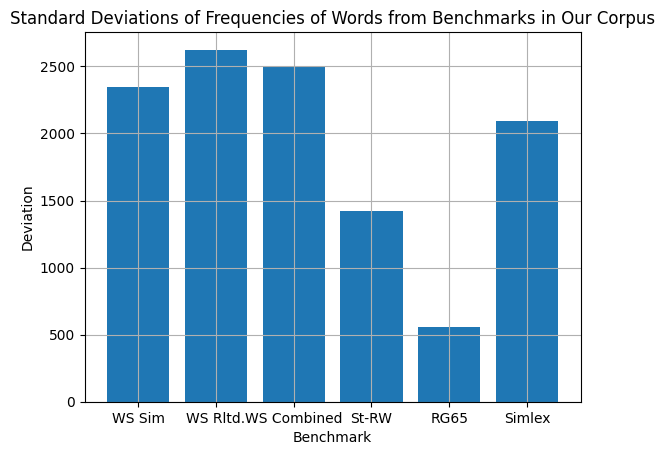

In [11]:
plt.bar(sets, deviations)

plt.title("Standard Deviations of Frequencies of Words from Benchmarks in Our Corpus")
plt.xlabel("Benchmark")
plt.ylabel("Deviation")
plt.grid("both")
plt.show()

# How did our models perform on these benchmarks?

<img src="https://i.imgur.com/w3XaAGX.png">